In [2]:
#Multiclass SVC Classifier

In [4]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  #load the first two features of the iris data 
y = iris.target       #load the target of the iris data

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])

In [10]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

param_grid = dict(svc__estimator__gamma=gammas, svc__estimator__C=Cs)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC()))]),
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.1,
                                                              1, 10],
                                        'svc__estimator__gamma': [0.001, 0.01,
                                                                  0.1, 1, 10]})

In [12]:
rand_grid.best_params_

{'svc__estimator__gamma': 0.01, 'svc__estimator__C': 10}

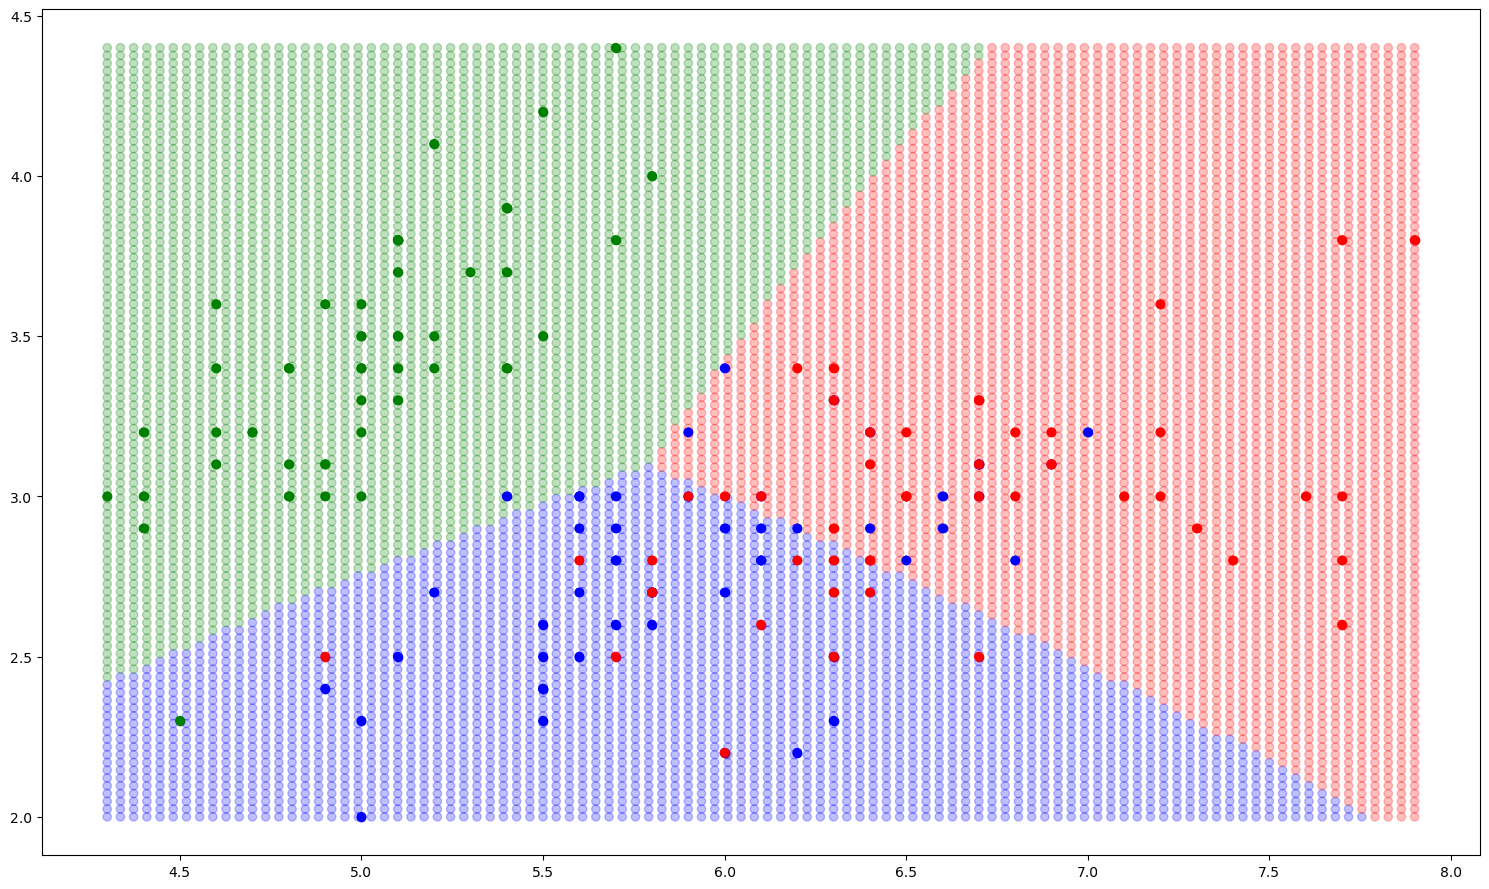

In [14]:
%matplotlib inline
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])


#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax,100), np.linspace(ymin, ymax,100))])

#Predictions on the grid
test_preds = rand_grid.predict(test_points)

plt.figure(figsize=(15,9))   #change figure-size for easier viewing

plt.scatter(X_0[:,0],X_0[:,1], color = 'green')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')

colors = np.array(['g', 'b', 'r'])
plt.tight_layout()
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])